In [62]:
import matplotlib.pyplot as plt
import numpy as np
from data.load_dataset import give_dataset


In [63]:
df_hm={}
origin_list=['ukb','oasis','ixi','abide']
for origin in origin_list:
    _,df_hm[origin]=give_dataset(origin,'test', batch_size=1,
                                                num_workers=4,
                                                shuffle=True,
                                                debug=False,
                                                preprocessing='none',
                                                task='age',
                                                share=1.0,
                                                balance=False)

Loading share 1.00 of UKB  test data.
['MR_ID', 'Subject', 'Age', 'Scanner', 'Scans', 'FreeSurfers', 'PUPs', 'Date', 'T1_path', 'ADRC_ADRCCLINICALDATA ID', 'Date_after_clinical', 'AgeBasedOnClinicalData']
Loading share 1.00  test data.
Loading ixi  test data.
Loading ABIDE  test data.


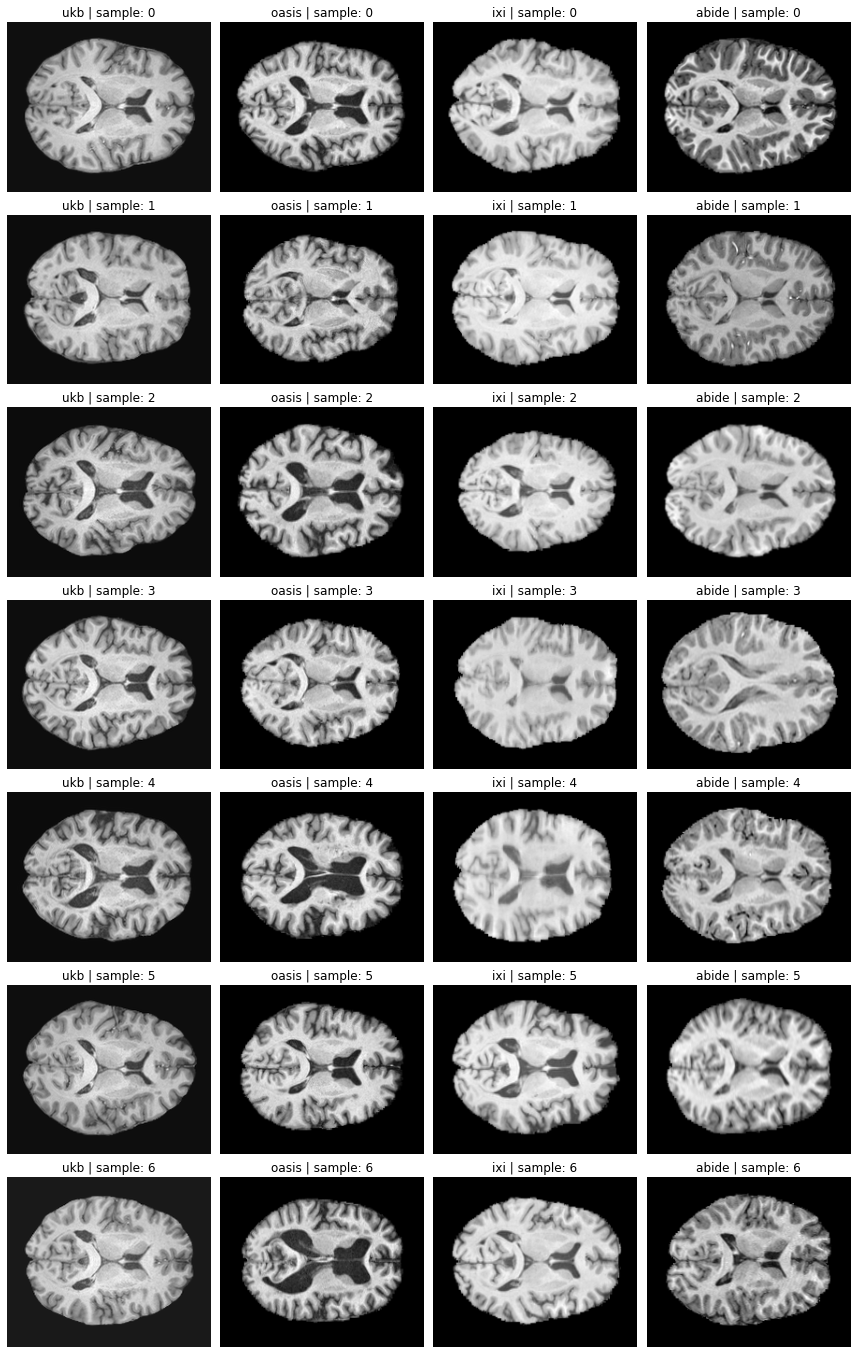

In [66]:
nsamples=7
scale=3.
ind_slice=84
fig,ax=plt.subplots(ncols=4,nrows=nsamples,figsize=(scale*4,0.9*nsamples*scale))

for idy, origin in enumerate(origin_list):
    for idx in range(nsamples):
        image,_=next(iter(df_hm[origin]))
        image=image.squeeze()
        image_slice=image[:,:,ind_slice]
        ax[idx,idy].imshow(image_slice,'gray')#,vmin=0.,vmax=8.)
        ax[idx,idy].axis('off')
        ax[idx,idy].set_title(origin + " | sample: "+str(idx))
        
# for idy, origin in enumerate(origin_list):
#     ax[0,idy].set_title(origin)
    
# for idx in range(ncols):
#     ax[idx,0].set_ylabel(idx)

plt.tight_layout(h_pad=1., w_pad=1.)
plt.savefig('visualization/plots/examples_from_data.png')
    